In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv('tips.csv')
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## eliciting information from data

In [4]:
figure = px.scatter(data_frame=data, x='total_bill', y="tip", size='size', color='sex', trendline="ols")

figure.show()

In [5]:
figure = px.scatter(data_frame=data, x='total_bill', y="tip", size='size', color='smoker',trendline="ols")
figure.show()

In [6]:
figure = px.scatter(data_frame=data, x='total_bill', y="tip", size='size', color='day' ,trendline="ols")
figure.show()

In [7]:
figure = px.scatter(data_frame=data, x='total_bill', y="tip", size='size', color='time', trendline="ols")
figure.show()

In [8]:
figure = px.scatter(data_frame=data, x='total_bill', y="tip", size='size', color='size',trendline="ols")
figure.show()

In [9]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.4)
figure.show()

In [10]:
figure = px.pie(data_frame=data, values='tip', names='sex', hole=.4)
figure.show()

In [11]:
figure = px.pie(data_frame=data, values='tip', names='size', hole=.4)
figure

In [12]:
figure = px.pie(data_frame=data, values='tip', names='smoker', hole=.4)
figure

In [13]:
figure = px.pie(data_frame=data, values='tip', names='time', hole=.4)
figure

## preprocessing

In [14]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
#mapping
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [16]:
#converting data frame to numpy array
x = np.asanyarray(data[['total_bill','sex','smoker','day','time','size']])
y = np.asanyarray(data['tip'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=50)

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
print('Coef is: \t', model.coef_)
print ('Intercept: \t', model.intercept_)


predicted_y = model.predict(x_test)

Coef is: 	 [ 0.08925365 -0.13824114 -0.05250981  0.05695682 -0.08405281  0.2315182 ]
Intercept: 	 0.6568856797901641


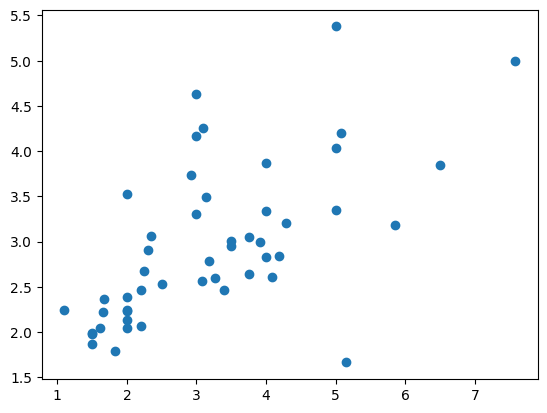

In [22]:
plt.scatter(y_test, predicted_y)
